In [1]:
import pandas as pd
from utils.functions import *
import lightgbm as lgb
import numpy as np
import plotly.express as px

pd.set_option("display.max_rows",200)

### Load data

In [3]:
path = 'data/'

naming = {
    "movies" : "IMDB movies.csv",
    "names" : "IMDB names.csv",
    "ratings" : "IMDB ratings.csv",
    "title" : "IMDB title_principals.csv"
}

for nm, p in naming.items():
    
    df = pd.read_csv(path+p)
    print(f"{nm} shape: \t{df.shape}")
    exec(f"{nm}={'df'}")

movies shape: 	(81273, 22)
names shape: 	(175715, 20)
ratings shape: 	(81273, 49)
title shape: 	(377848, 6)


#### Check individual tables

In [4]:
df_stats(movies)
movies.head(5).T

                      DataTypes  MissingPct  NUnique
avg_vote                float64    0.000000       90
metascore               float64   84.346585       99
year                      int64    0.000000      110
duration                  int64    0.000000      265
reviews_from_critics    float64   13.518635      587
reviews_from_users      float64    8.707689     1161
genre                    object    0.000000     1264
language                 object    0.928968     4251
budget                   object   71.941481     4425
country                  object    0.047986     4632
usa_gross_income         object   81.428027    14648
votes                     int64    0.000000    14794
date_published           object    0.000000    21087
worlwide_gross_income    object   63.220258    29378
production_company       object    5.321571    30122
director                 object    0.089821    32544
writer                   object    1.837018    63335
title                    object    0.000000   

,0,1,2,3,4
imdb_title_id,tt0000574,tt0001892,tt0002101,tt0002130,tt0002199
title,The Story of the Kelly Gang,Den sorte drøm,Cleopatra,L'Inferno,"From the Manger to the Cross; or, Jesus of Naz..."
original_title,The Story of the Kelly Gang,Den sorte drøm,Cleopatra,L'Inferno,"From the Manger to the Cross; or, Jesus of Naz..."
year,1906,1911,1912,1911,1912
date_published,1906-12-26,1911-08-19,1912-11-13,1911-03-06,1913
genre,"Biography, Crime, Drama",Drama,"Drama, History","Adventure, Drama, Fantasy","Biography, Drama"
duration,70,53,100,68,60
country,Australia,"Germany, Denmark",USA,Italy,USA
language,NaN,NaN,English,Italian,English
director,Charles Tait,Urban Gad,Charles L. Gaskill,"Francesco Bertolini, Adolfo Padovan",Sidney Olcott


In [5]:
df_stats(names)
names.head(5).T

                      DataTypes  MissingPct  NUnique
spouses_with_children     int64    0.000000        7
divorces                  int64    0.000000       10
spouses                   int64    0.000000       11
children                  int64    0.000000       15
height                  float64   82.881370       68
death_year              float64   84.726404      240
birth_year              float64   57.254076      282
reason_of_death          object   93.186694     1582
primary_profession       object    0.212845     5331
place_of_death           object   85.751928     5962
date_of_death            object   84.716729    16471
place_of_birth           object   59.524230    17055
death_details            object   84.712745    26435
date_of_birth            object   57.259198    32607
birth_details            object   57.186922    73108
bio                      object   30.095894   122806
known_for_titles         object    0.550323   169481
name                     object    0.000000   

,0,1,2,3,4
imdb_name_id,nm0000001,nm0000002,nm0000003,nm0000004,nm0000005
name,Fred Astaire,Lauren Bacall,Brigitte Bardot,John Belushi,Ingmar Bergman
birth_name,Frederic Austerlitz Jr.,Betty Joan Perske,Brigitte Bardot,John Adam Belushi,Ernst Ingmar Bergman
height,177,174,166,173,179
bio,"Fred Astaire was born in Omaha, Nebraska, to J...",Lauren Bacall was born Betty Joan Perske on Se...,"Brigitte Bardot was born on September 28, 1934...","John Belushi was born in Chicago, Illinois, US...","Ernst Ingmar Bergman was born July 14, 1918, t..."
birth_details,"May 10, 1899 in Omaha, Nebraska, USA","September 16, 1924 in The Bronx, New York City...","September 28, 1934 in Paris, France","January 24, 1949 in Chicago, Illinois, USA","July 14, 1918 in Uppsala, Uppsala län, Sweden"
birth_year,1899,1924,1934,1949,1918
date_of_birth,1899-05-10,1924-09-16,1934-09-28,1949-01-24,1918-07-14
place_of_birth,"Omaha, Nebraska, USA","The Bronx, New York City, New York, USA","Paris, France","Chicago, Illinois, USA","Uppsala, Uppsala län, Sweden"
death_details,"June 22, 1987 in Los Angeles, California, USA ...","August 12, 2014 in New York City, New York, US...",NaN,"March 5, 1982 in Hollywood, Los Angeles, Calif...","July 30, 2007 in Fårö, Gotlands län, Sweden"


In [6]:
df_stats(ratings)
names.head(5).T

                          DataTypes  MissingPct  NUnique
median_vote                 float64    0.000000       19
females_0age_avg_vote       float64   81.133956       84
top1000_voters_rating       float64    0.745635       89
males_allages_avg_vote      float64    0.001230       89
weighted_average_vote       float64    0.000000       90
mean_vote                   float64    0.000000       90
allgenders_45age_avg_vote   float64    0.139038       90
non_us_voters_rating        float64    0.004922       90
us_voters_rating            float64    0.294071       91
males_0age_avg_vote         float64   74.974469       91
females_30age_avg_vote      float64    1.063084       91
males_30age_avg_vote        float64    0.011074       91
females_18age_avg_vote      float64    6.193939       91
males_45age_avg_vote        float64    0.188254       91
females_allages_avg_vote    float64    0.086129       91
males_18age_avg_vote        float64    1.299324       91
females_45age_avg_vote      flo

,0,1,2,3,4
imdb_name_id,nm0000001,nm0000002,nm0000003,nm0000004,nm0000005
name,Fred Astaire,Lauren Bacall,Brigitte Bardot,John Belushi,Ingmar Bergman
birth_name,Frederic Austerlitz Jr.,Betty Joan Perske,Brigitte Bardot,John Adam Belushi,Ernst Ingmar Bergman
height,177,174,166,173,179
bio,"Fred Astaire was born in Omaha, Nebraska, to J...",Lauren Bacall was born Betty Joan Perske on Se...,"Brigitte Bardot was born on September 28, 1934...","John Belushi was born in Chicago, Illinois, US...","Ernst Ingmar Bergman was born July 14, 1918, t..."
birth_details,"May 10, 1899 in Omaha, Nebraska, USA","September 16, 1924 in The Bronx, New York City...","September 28, 1934 in Paris, France","January 24, 1949 in Chicago, Illinois, USA","July 14, 1918 in Uppsala, Uppsala län, Sweden"
birth_year,1899,1924,1934,1949,1918
date_of_birth,1899-05-10,1924-09-16,1934-09-28,1949-01-24,1918-07-14
place_of_birth,"Omaha, Nebraska, USA","The Bronx, New York City, New York, USA","Paris, France","Chicago, Illinois, USA","Uppsala, Uppsala län, Sweden"
death_details,"June 22, 1987 in Los Angeles, California, USA ...","August 12, 2014 in New York City, New York, US...",NaN,"March 5, 1982 in Hollywood, Los Angeles, Calif...","July 30, 2007 in Fårö, Gotlands län, Sweden"


In [7]:
df_stats(title)
names.head(5).T

              DataTypes  MissingPct  NUnique
ordering          int64    0.000000       10
category         object    0.000000       12
job              object   74.384409     4549
imdb_title_id    object    0.000000    38800
characters       object   59.300036   103920
imdb_name_id     object    0.000000   175715


,0,1,2,3,4
imdb_name_id,nm0000001,nm0000002,nm0000003,nm0000004,nm0000005
name,Fred Astaire,Lauren Bacall,Brigitte Bardot,John Belushi,Ingmar Bergman
birth_name,Frederic Austerlitz Jr.,Betty Joan Perske,Brigitte Bardot,John Adam Belushi,Ernst Ingmar Bergman
height,177,174,166,173,179
bio,"Fred Astaire was born in Omaha, Nebraska, to J...",Lauren Bacall was born Betty Joan Perske on Se...,"Brigitte Bardot was born on September 28, 1934...","John Belushi was born in Chicago, Illinois, US...","Ernst Ingmar Bergman was born July 14, 1918, t..."
birth_details,"May 10, 1899 in Omaha, Nebraska, USA","September 16, 1924 in The Bronx, New York City...","September 28, 1934 in Paris, France","January 24, 1949 in Chicago, Illinois, USA","July 14, 1918 in Uppsala, Uppsala län, Sweden"
birth_year,1899,1924,1934,1949,1918
date_of_birth,1899-05-10,1924-09-16,1934-09-28,1949-01-24,1918-07-14
place_of_birth,"Omaha, Nebraska, USA","The Bronx, New York City, New York, USA","Paris, France","Chicago, Illinois, USA","Uppsala, Uppsala län, Sweden"
death_details,"June 22, 1987 in Los Angeles, California, USA ...","August 12, 2014 in New York City, New York, US...",NaN,"March 5, 1982 in Hollywood, Los Angeles, Calif...","July 30, 2007 in Fårö, Gotlands län, Sweden"


### Create master table

#### Check column intersection for potential merge

In [8]:
np.intersect1d(list(movies), list(names))

array([], dtype='<U21')

In [9]:
np.intersect1d(list(movies), list(ratings))

array(['imdb_title_id'], dtype='<U25')

In [10]:
np.intersect1d(list(movies), list(title))

array(['imdb_title_id'], dtype='<U21')

In [11]:
np.intersect1d(list(names), list(ratings))

array([], dtype='<U25')

In [12]:
np.intersect1d(list(names), list(title))

array(['imdb_name_id'], dtype='<U21')

In [13]:
np.intersect1d(list(ratings), list(title))

array(['imdb_title_id'], dtype='<U25')

#### Merge

In [14]:
df_master = pd.merge(
    left=movies,
    right=ratings,
    how="inner"
)
df_master.shape

(81273, 70)

In [15]:
df_master.to_csv(path+"master.csv")

### EDA

In [127]:
df_stats(df_master)

,DataTypes,MissingPct,NUnique,mean,std,min,25%,50%,75%,max
median_vote,float64,0.0,19,6.3,1.5,1.0,6.0,7.0,7.0,10.0
females_0age_avg_vote,float64,81.1,84,6.9,2.2,1.0,5.9,7.0,8.1,10.0
males_allages_avg_vote,float64,0.0,89,5.8,1.3,1.0,5.1,6.1,6.7,10.0
top1000_voters_rating,float64,0.7,89,5.1,1.3,1.0,4.3,5.3,6.0,10.0
mean_vote,float64,0.0,90,6.3,1.2,1.0,5.6,6.4,7.1,10.0
weighted_average_vote,float64,0.0,90,5.9,1.2,1.0,5.2,6.1,6.8,10.0
allgenders_45age_avg_vote,float64,0.1,90,5.7,1.3,1.0,5.0,5.9,6.6,10.0
avg_vote,float64,0.0,90,5.9,1.2,1.0,5.2,6.1,6.8,10.0
non_us_voters_rating,float64,0.0,90,5.8,1.3,1.0,5.1,6.0,6.7,10.0
males_30age_avg_vote,float64,0.0,91,5.8,1.3,1.0,5.1,6.0,6.8,10.0


In [126]:
melted = pd.melt(df_master[['avg_vote','mean_vote', 'median_vote']])
melted.sample(3,random_state=2020)

,variable,value
62408,avg_vote,5.2
115664,mean_vote,6.7
199891,median_vote,8.0


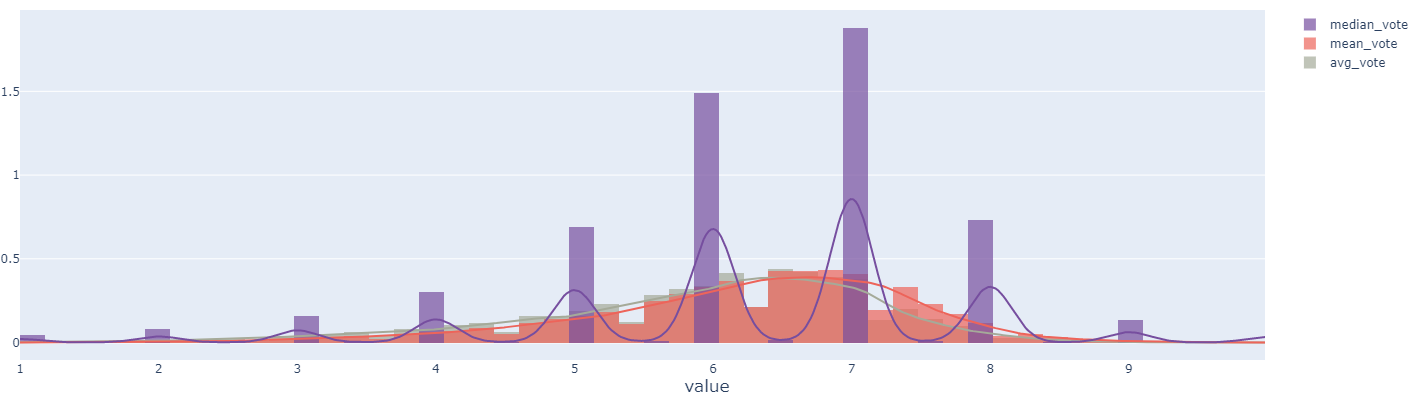

In [125]:
comp_dist(
    dataframe=melted,
    feature="value",
    color_var="variable",
    n_bins=50,
    palette=0
)

#### Correlations

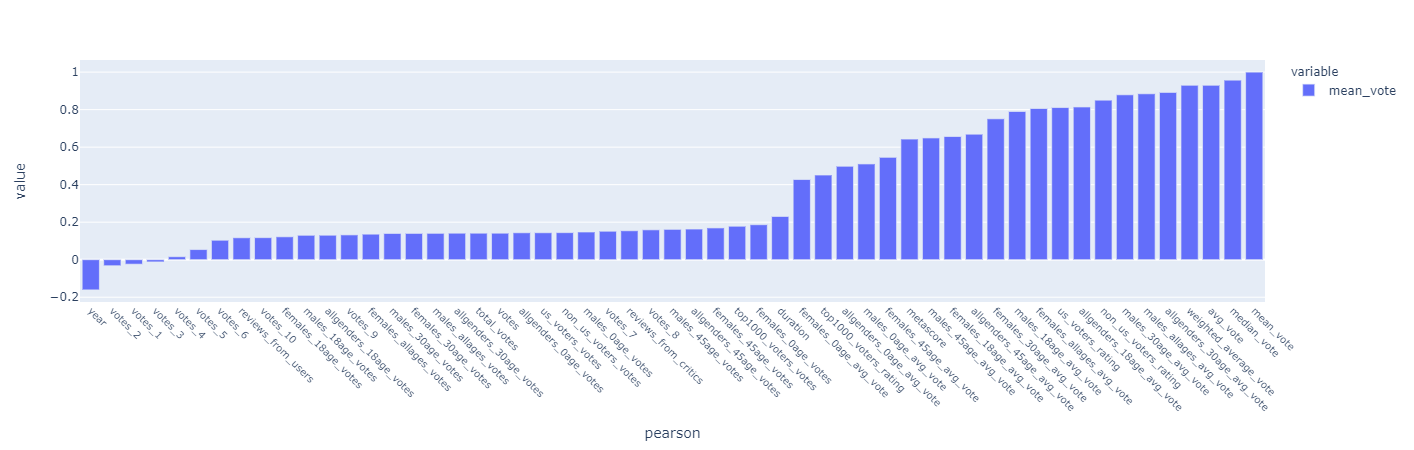

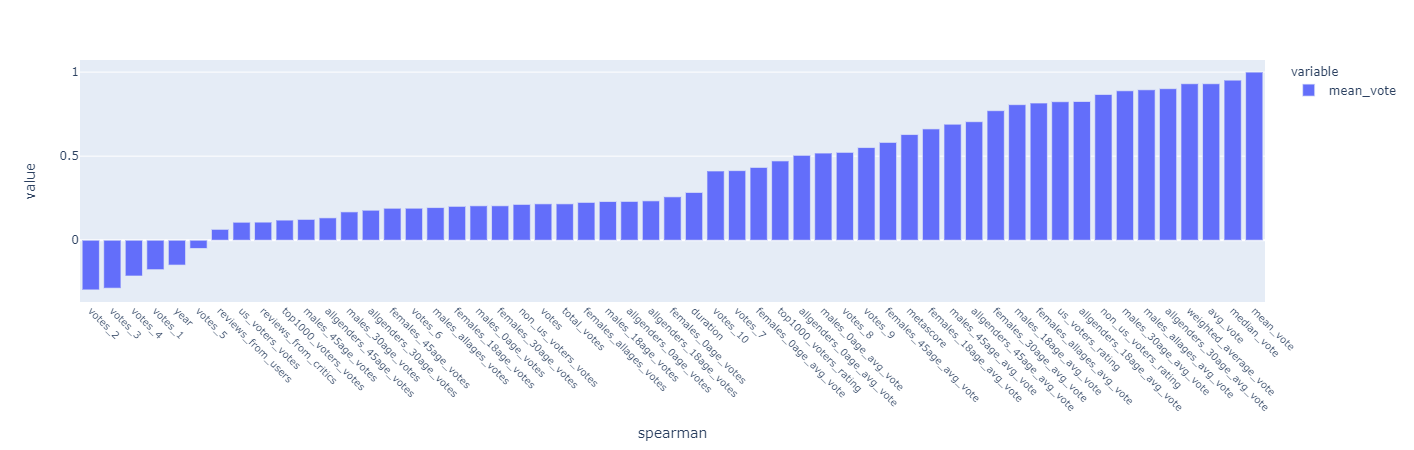

In [141]:
corr_plot(df_master,target='mean_vote')